In [3]:
import numpy as np
import os
import cv2
import dlib

In [4]:
# Function to align face using eye landmarks
def align_face(image, landmarks):
    left_eye = (landmarks[36] + landmarks[39]) // 2
    right_eye = (landmarks[42] + landmarks[45]) // 2
    # Calculate angle between eyes
    dY = right_eye[1] - left_eye[1]
    dX = right_eye[0] - left_eye[0]
    angle = np.degrees(np.arctan2(dY, dX))
    # Compute center of the eyes
    center = ((int(left_eye[0] + right_eye[0]) // 2), int((left_eye[1] + right_eye[1]) // 2))
    # Rotate image to align eyes horizontally
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    aligned_face = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
    return aligned_face

In [10]:
def preprocess_image(image_path, detector, predictor):
    # Read the image and convert to grayscale
    #image = rgb2gray(cv2.imread(image_path))
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2GRAY)
    # Detect face and landmarks
    faces = detector(image)
    for face in faces:
        landmarks = predictor(image, face)
        landmarks = np.array([[p.x, p.y] for p in landmarks.parts()])
        aligned_face = align_face(image, landmarks)
        
        # Normalize the aligned face using histogram equalization
        normalized_face = cv2.equalizeHist(aligned_face)           
        # Resize image
        preprocessed_image = cv2.resize(normalized_face,(128,128))

    return preprocessed_image

In [6]:
# Load Dlib’s face detector and shape predictor (landmarks)
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [11]:
image_path = r"C:\Users\venla\Documents\Affective_computing\Project\OriginalImg\NI\Dark\P005\Happiness\001.jpeg"
image_processed = preprocess_image(image_path, detector, predictor)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\histogram.cpp:3440: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'cv::equalizeHist'


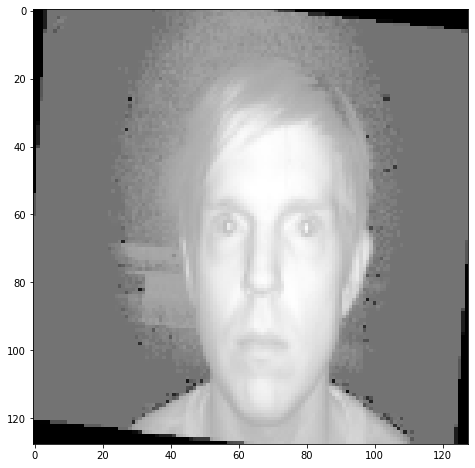

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(image_processed, "gray")
plt.show()